# Введение

Обучение с учителем (обучение на размеченных данных) используется для решения двух основных типов задач: регрессия и классификация. Пример регрессии мы рассмотрели на прошлом занятии. В этой лабораторной работе рассмотрим классификацию.

##Классификация

Простыми словами, классификация - это предсказание категории объекта. То есть, необходимо разделить объекты по заранее известному признаку: шарики по цветам, документы по языкам, музыку по жанрам.
Примеры задач классификации:
*   Спам-фильтры
*   Определение языка
*   Поиск похожих документов
*   Анализ тональности
*   Распознавание рукописных букв и цифр
*   Определение подозрительных транзакций

Задача классификации состоит в определении к какому классу из, как минимум, двух изначально известных относится данный объект. Обычно таким объектом является вектор в n-мерном вещественном пространстве $\mathbb{R^n}$. Координаты вектора описывают отдельные аттрибуты объекта. Например, цвет c, заданный в модели RGB, является вектором в трехмерном пространстве: c=(red, green, blue).

Математическая формулировка задачи классификации такова: пусть $X$ — пространство объектов (например, $\mathbb{R^n}$), $Y$ — наши классы (например, $Y$ = {-1,1}). Дана обучающая выборка: $(x_1,y_1),..., (x_m,y_m)$. Требуется построить функцию $F : X\rightarrow Y$ (классификатор), сопоставляющий класс $y$ произвольному объекту $x$.

Если классов всего два («спам / не спам», «давать кредит / не давать кредит», «красное / черное»), то задача называется бинарной классификацией. Если классов несколько — многоклассовая (мультиклассовая) классификация.

Примеры алгоритмов, используемых для классификации: *Наивный Байес, Деревья Решений, Логистическая Регрессия, K-ближайших соседей, Метод Опорных Векторов*.


###Метод опорных векторов

Пожалуй, одним из самых популярным методом классификации является метод опорных векторов (Support Vector Machine — SVM). Данный метод изначально относится к бинарным классификаторам, хотя существуют способы заставить его работать и для задач мультиклассификации.

Идея SVM по своей сути проста: он ищет, как так провести две прямые между категориями, чтобы между ними образовался наибольший зазор. Проиллюстрируем это на простом примере: даны точки на плоскости, разбитые на два класса. Координаты точек - это два признака (для двумерного пространства, как в нашем случае). Например, для больного это уровень сахара в крови и индекс массы тела. Обучающая выборка разбита на 2 класса: диабетики (синие точки) и недиабетики(зеленые точки). Проведем линию, разделяющую эти два класса (красная линия). Далее, все новые точки (не из обучающей выборки) автоматически классифицируются следующим образом:

* точка выше прямой попадает в класс A,
* точка ниже прямой — в класс B.

In [138]:
#этот код - просто вставка картинки по ссылке
from IPython.display import Image 
from IPython.core.display import HTML 
Image(url= "https://habrastorage.org/storage/habraeffect/8c/98/8c98d4824065028420f290d88e52b40e.png") 

Такую прямую назовем разделяющей прямой. Однако, в пространствах высоких размерностей прямая уже не будет разделять наши классы, так как понятие «ниже прямой» или «выше прямой» теряет всякий смысл. Поэтому вместо прямых необходимо рассматривать гиперплоскости — пространства, размерность которых на единицу меньше, чем размерность исходного пространства. В $\mathbb{R^3}$, например, гиперплоскость — это обычная двумерная плоскость.

В нашем примере существует несколько прямых, разделяющих два класса

In [139]:
Image(url= "https://habrastorage.org/storage/habraeffect/7c/5f/7c5f4284e204a7c4b544a9ca175a2b13.png") 

С точки зрения точности классификации лучше всего выбрать прямую, расстояние от которой до каждого класса максимально. Другими словами, выберем ту прямую, которая разделяет классы наилучшим образом (красная прямая на рисунке выше). Такая прямая, а в общем случае — гиперплоскость, называется *оптимальной разделяющей гиперплоскостью*.

Алгоритм SVM устроен таким образом, что он ищет точки на графике, которые расположены непосредственно к линии разделения ближе всего. Эти точки называются *опорными векторами*. Затем, алгоритм вычисляет расстояние между опорными векторами и разделяющей плоскостью. Это расстояние которое называется *зазором*. Основная цель алгоритма — **максимизировать расстояние зазора**. Лучшей гиперплоскостью считается такая гиперплоскость, для которой этот зазор является максимально большим.

In [140]:
Image(url= "https://habrastorage.org/webt/ps/iy/he/psiyhexemtrhnqukbvmvaqzafvi.png") 

####Линейная неразделимость

На практике случаи, когда данные можно разделить гиперплоскостью, или, как еще говорят, линейно, довольно редки. Пример линейной неразделимости можно видеть на рисунке

In [141]:
Image(url= "https://habrastorage.org/storage/habraeffect/3b/0a/3b0af1a82f51ee4b5fbbadf8b51d8fab.png")

В этом случае поступают так: все элементы обучающей выборки вкладываются в пространство $X$ более высокой размерности с помощью специального отображения $\varphi:\mathbb{R^n}\rightarrow X$,использующую набор математических функций, известных как *ядра*. При этом отображение  выбирается так, чтобы в новом пространстве X выборка была линейно разделима.

Фактически мы добавляем еще одно измерение, чтобы разделить объекты, когда линейная разделимость невозможна

In [142]:
Image(url= "https://miro.medium.com/max/838/1*mCwnu5kXot6buL7jeIafqQ.png")

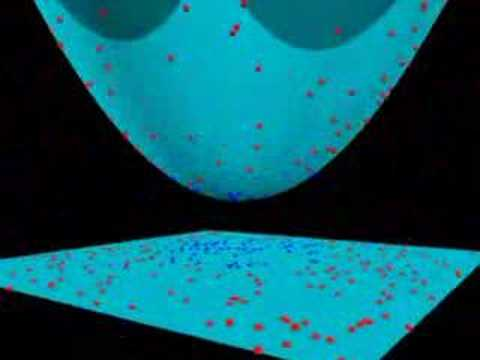

In [143]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

####Реализация SVM c помощью библиотеки Scikit-Learn

В качестве примера рассмотрим задачу определения подлинности банкноты по 4 признакам, вычисленным по изображениям с помощью Wavelet Transforn tool. 
*   [Датасет](https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view), 
*   [описание датасета](https://archive.ics.uci.edu/ml/datasets/banknote+authentication).  

Банкнота может быть подлинной или фальшивой. То есть, перед нами стоит задача бинарной классификации

####Основные шаги:



1.   Импортируем необходимые библиотеки
2.   Скачиваем данные
3.   Готовим данные, делим датасет на тренировочную и тестовую выборку
4.   Обучаем модель
5.   Предсказываем результат для тестовой выборки
6.   Оцениваем модель
7.   Делаем выводы



#####1. Импортируйте необходимы библиотеки

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#####2. Скачайте датасет, сохраните его локально на своем компьютере. 
Если вы работаете с google colabб сделайте upload этого файла в google colab. Прочитайте данные из csv-файла

In [0]:
bankdata = pd.read_csv("bill_authentication.csv")

In [146]:
bankdata.shape

(1372, 5)

In [147]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [148]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Мы видим, что все признаки в наборе данных числовые. Целевая функция также числовая, то есть 0 и 1

#####3. Подготовьте данные
Подготовка данных включает в себя:
*    разделение данных на признаки (атрибуты) и целевую функцию (метку)
*    разделение датасета на тренировочный и тестовый

Чтобы разделить данные на признаки и целевую функцию, выполните следующий код

In [0]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

Теперь все столбцы датасета, кроме столбца "Class", хранятся в переменной X - это наши признаки. Метки (столбец "Class") хранятся в переменной y

Разделим датасет на тренировочную и тестовую выборку с помощью метода train_test_split из библиотеки Scikit-Learn (так же, как делали в прошлой лабораторной работе)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#####4. Обучите модель на тренировочных данных. 

Scikit-Learn содержит **svm** библиотеку, которая включает в себя встроенные классы для различных алгоритмов SVM. Поскольку мы собираемся выполнить задачу классификации, мы будем использовать класс классификатора опорных векторов, который записан как SVC в svm библиотеке Scikit-Learn . Этот класс принимает один параметр, который является типом ядра. В случае простого SVM мы просто устанавливаем этот параметр как «линейный», поскольку простые SVM могут классифицировать только линейно разделимые данные. Нелинейные ядра в рамках данной лабораторной работы рассматривать не будем.

In [151]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#####5. Предскажите результаты для тестовой выбоки

In [0]:
y_pred = svclassifier.predict(X_test)

In [153]:
print(y_pred[:10])

[1 0 1 1 1 0 0 0 1 0]


In [154]:
print(y_test[:10])

1099    1
314     0
1186    1
1271    1
883     1
14      0
179     0
412     0
1329    1
686     0
Name: Class, dtype: int64


#####6. Оцените алгоритм

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[148   4]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       152
           1       0.97      1.00      0.98       123

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Давайте посмотрим, какие метрики можно использовать в задачах классификации и как по ним оценить качество модели

6.1 Матрица ошибок (Confusion_matrix)

Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:

In [156]:
Image(url= "https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816", width=400) 

Таким образом, ошибки классификации бывают двух видов: False Negative (FNs) и False Positive (FPs). False Positive - это ложное срабатывание. То есть, банкнота подлинная, но мы классифицировали ее как фальшивую. False Negative - неопознанная фальшивка.

6.2 Accuracy

Интуитивно понятной, очевидной и почти неиспользуемой метрикой является accuracy — доля правильных ответов алгоритма:

$$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Эта метрика бесполезна в задачах с неравными классами.

6.3 Precision, recall и F-мера

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики precision (точность) и recall (полнота).

$$\large precision = \frac{TP}{TP + FP}$$ $$\large recall = \frac{TP}{TP + FN}$$

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

Понятно что чем выше точность и полнота, тем лучше. Но в реальной жизни максимальная точность и полнота не достижимы одновременно и приходится искать некий баланс. Поэтому, хотелось бы иметь некую метрику которая объединяла бы в себе информацию о точности и полноте нашего алгоритма. 

Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. F-мера (в общем случае $F_{\beta}$) — среднее гармоническое precision и recall :

$$\large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$$

где β принимает значения в диапазоне 0<β<1 если вы хотите отдать приоритет точности, а при β>1 приоритет отдается полноте. При β=1 получим среднее гармоническое между точностью и полнотой

F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

### Дерево решений

Вторым, рассматриваемым в этой лабораторной, методом является Дерево решений. Решение, в какой класс причислить объект, программа принимает на основе множества вопросов, ответами на которые является "да" или "нет". 

Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.

Деревья разделяются на уровни, и, чем выше уровень, тем более общий должен быть вопрос.

В реальной жизни чаще всего используется не одно Дерево решений, а так называемый алгоритм Случайного леса (random forest).

Возьмем для примера ситуацию в банке, когда необходимо принять решение о выдаче кредита. Начало дерева решений может иметь подобный вид:

In [157]:
Image(url= "https://hsto.org/files/194/9b6/ae9/1949b6ae97ab4fc9b1a37fbf182eda8f.gif", width=400) 

На основе этого дерева 40-летнему мужчине, у которого есть дом, будет выдан кредит.

Для обучения модели достаточно "скормить" ей тренировочные данные, а необходимые вопросы будут подобраны автоматически. При обучении модели будет введен примесь(критерий) Джинни (Gini) или Загрязнение Джини (! не путать с коэффициентом Джинни). Это величина, которую дерево решений стремится минимизировать при разделении каждого узла. Представляет возможность того, что случайно выбранный образец будет неверно классифицирован в определённом узле.

$$Gini(n) = 1-\sum_{i=1}^J{p_i^2}$$

где n - это номер узла,
    J - количество классов,
    p_i - количество образцов(данных),
    i - номер образца.

При рассмотрении этого метода мы рассмотрим важный параметр в машинном обучении как Переобучение. Простыми словами это когда построенная модель хорошо работает на примерах из обучающей выборки, но  плохо работает на примерах из тестовой выборки. Получается, что модель подстроилась не только под важные закономерности в данных, но и под существующих в них шум. Дерево решений относится к тому методу, который с высокой вероятноятью без ограничений даст переобучение модели.

Алгоритм дерева решений часто  переобучается, если не ограничить его максимальную глубину или не использовать несколько деревьев (случайный лес). Дерево решений обладает неограниченной гибкостью и может разрастаться, пока не достигнет состояния идеальной классификации, в которой каждому образцу из набора данных будет соответствовать один лист.

Возвращаясь к нашему датасету, попробуем применить Дерево решений для определения подлинности банкноты. 

#####4. Обучите модель на тренировочных данных. 

Scikit-Learn содержит tree библиотеку, которая включает в себя встроенные классы для различных алгоритмов построения деревьев. Мы будем использовать алгоритм CART (Classification And Regression Tree), который записан как DecisionTreeClassifier в tree библиотеке Scikit-Learn без дополнительных параметров. Основные параметры этого класса:


*   max_depth – максимальная глубина дерева
*   max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве
*   min_samples_leaf – минимальное число объектов в листе.

Однако для данной задачи мы их ограничивать не будем.

In [158]:
from sklearn.tree import DecisionTreeClassifier
TreeClassifier = DecisionTreeClassifier()
TreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#####5. Предскажите результаты для тестовой выбоки

In [0]:
yTree_pred = TreeClassifier.predict(X_test)

In [160]:
print(yTree_pred[:10])

[1 0 1 1 1 0 0 0 1 0]


In [161]:
print(y_test[:10])

1099    1
314     0
1186    1
1271    1
883     1
14      0
179     0
412     0
1329    1
686     0
Name: Class, dtype: int64


#####6. Оцените алгоритм

In [162]:
print(confusion_matrix(y_test, yTree_pred))
print(classification_report(y_test, yTree_pred))

[[150   2]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       152
           1       0.98      1.00      0.99       123

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



При использовании Деревьев решений хорошим способом оценить результат является построение визуализированного дерева на основе обучения. 

Для этого выделим столбцы нашего датасета и построим на их основе Дерево.

In [163]:
X_train.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [0]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
# в feature_names можно прямо прописать названия признаков, а можно написать X_train.columns
export_graphviz(TreeClassifier, feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'], class_names=['0', '1'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

Во всех узлах, кроме листьев (цветные узлы без исходящих связей), содержится 5 частей:
1. Вопрос о значении параметра образца. Ответ может принимать значение True или False. Это точка разделения узла, в зависимости от ответа определяется, в каком направлении вниз по дереву продвинется образец данных.
2.  Gini: средневзвешенное загрязнение Джини должно уменьшаться по мере того, как мы движемся вниз по дереву.
3.  Samples: количество прошедших через этот узел образцов.
4.  Value: отношение классов, прошедших через этот узел, выраженное в абсолютных числах. К примеру, верхний узел выделил 605 образцов класса 0 и 492 образца класса 1.
5. Class: класс большинства прошедших через узел образцов. Для листьев это прогнозируемое значение всех попадающих в эти узлы элементов.

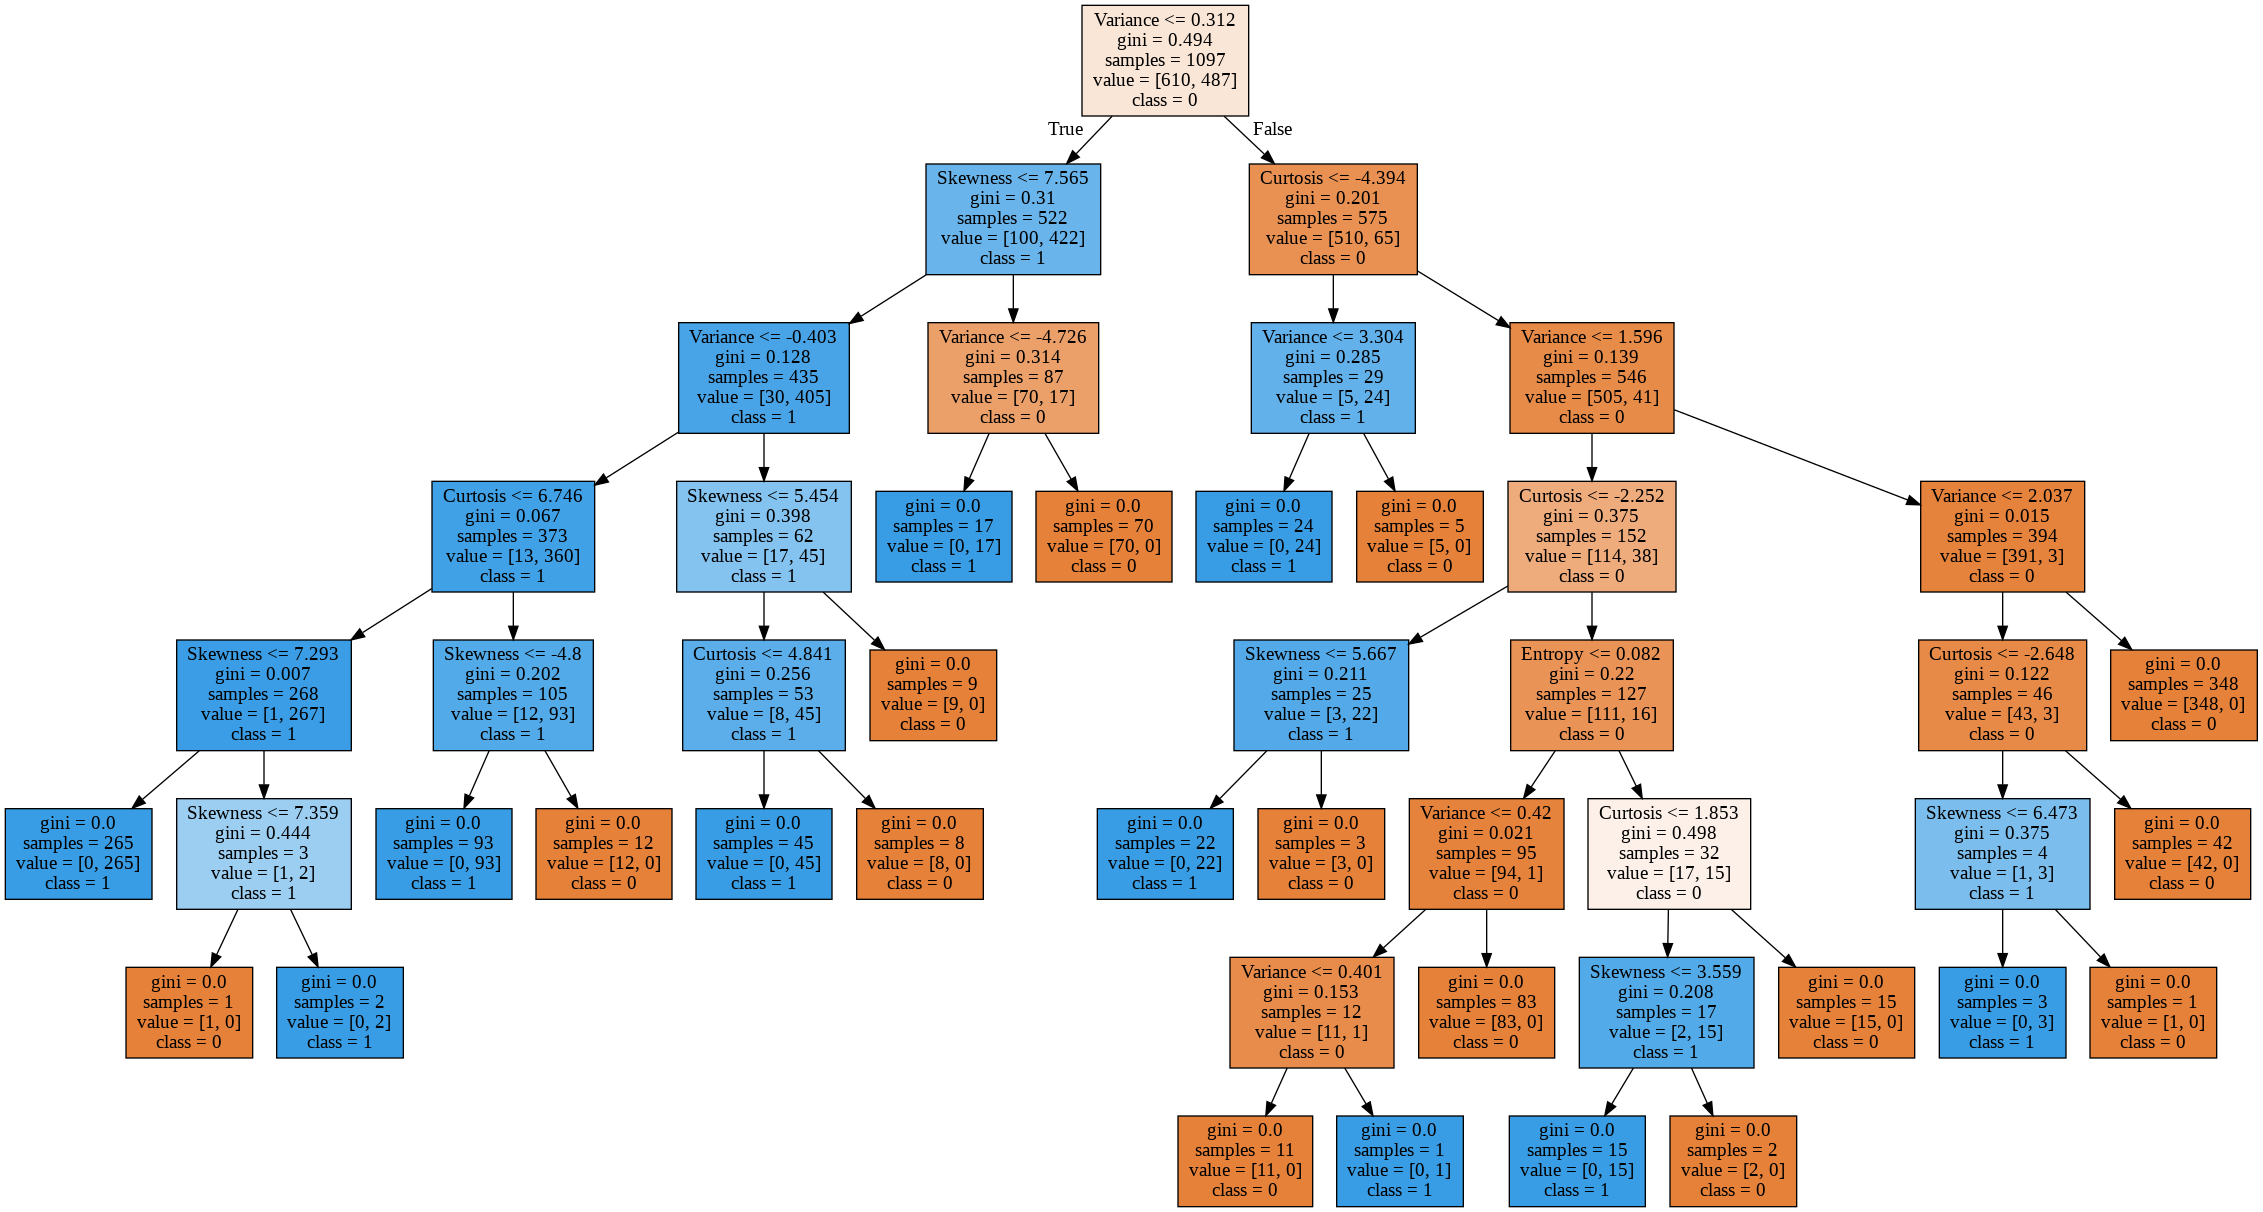

In [165]:
Image("small_tree.png", width=1200)

# Задание

1. Возьмите датасет [Heart Disease](https://www.kaggle.com/ronitf/heart-disease-uci/) или [Pulsar Star](https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/) и сравните результаты применения метода опорных векторов и метода деревьев на выбранном датасете.
2. При применении метода деревьев обучите классификатор дважды: без ограничений и с ограничениями одного или нескольких основных параметров.
3. Постройте визуализацию дерева.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
heart = pd.read_csv("heart.csv")

In [168]:
heart.shape

(303, 14)

In [169]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [170]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [0]:
X = heart.drop('target', axis=1)
y = heart['target']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [173]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X_test)

In [175]:
print(y_pred[:10])

[0 1 0 1 0 1 1 1 1 0]


In [176]:
print(y_test[:10])

272    0
89     1
252    0
83     1
95     1
302    0
90     1
161    1
4      1
239    0
Name: target, dtype: int64


In [177]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21  7]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84        28
           1       0.82      0.97      0.89        33

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



In [178]:
from sklearn.tree import DecisionTreeClassifier
TreeClassifier = DecisionTreeClassifier()
TreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
yTree_pred = TreeClassifier.predict(X_test)

In [180]:
print(yTree_pred[:10])

[1 1 0 1 0 1 1 1 0 0]


In [181]:
print(y_test[:10])

272    0
89     1
252    0
83     1
95     1
302    0
90     1
161    1
4      1
239    0
Name: target, dtype: int64


In [182]:
print(confusion_matrix(y_test, yTree_pred))
print(classification_report(y_test, yTree_pred))

[[19  9]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [197]:
TreeClassifier1 = DecisionTreeClassifier(max_depth=2)
TreeClassifier1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
yTree_pred = TreeClassifier1.predict(X_test)

In [185]:
print(yTree_pred[:10])

[0 0 0 0 0 1 1 1 0 0]


In [186]:
print(y_test[:10])

272    0
89     1
252    0
83     1
95     1
302    0
90     1
161    1
4      1
239    0
Name: target, dtype: int64


In [199]:
print(confusion_matrix(y_test, yTree_pred))
print(classification_report(y_test, yTree_pred))

[[21  7]
 [14 19]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        28
           1       0.73      0.58      0.64        33

    accuracy                           0.66        61
   macro avg       0.67      0.66      0.66        61
weighted avg       0.67      0.66      0.65        61



In [188]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [0]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
# в feature_names можно прямо прописать названия признаков, а можно написать X_train.columns
export_graphviz(TreeClassifier, feature_names=X_train.columns, class_names=['0', '1'], 
out_file='heart.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'heart.dot' -o 'heart.png'

In [0]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
# в feature_names можно прямо прописать названия признаков, а можно написать X_train.columns
export_graphviz(TreeClassifier1, feature_names=X_train.columns, class_names=['0', '1'], 
out_file='heart1.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'heart1.dot' -o 'heart1.png'

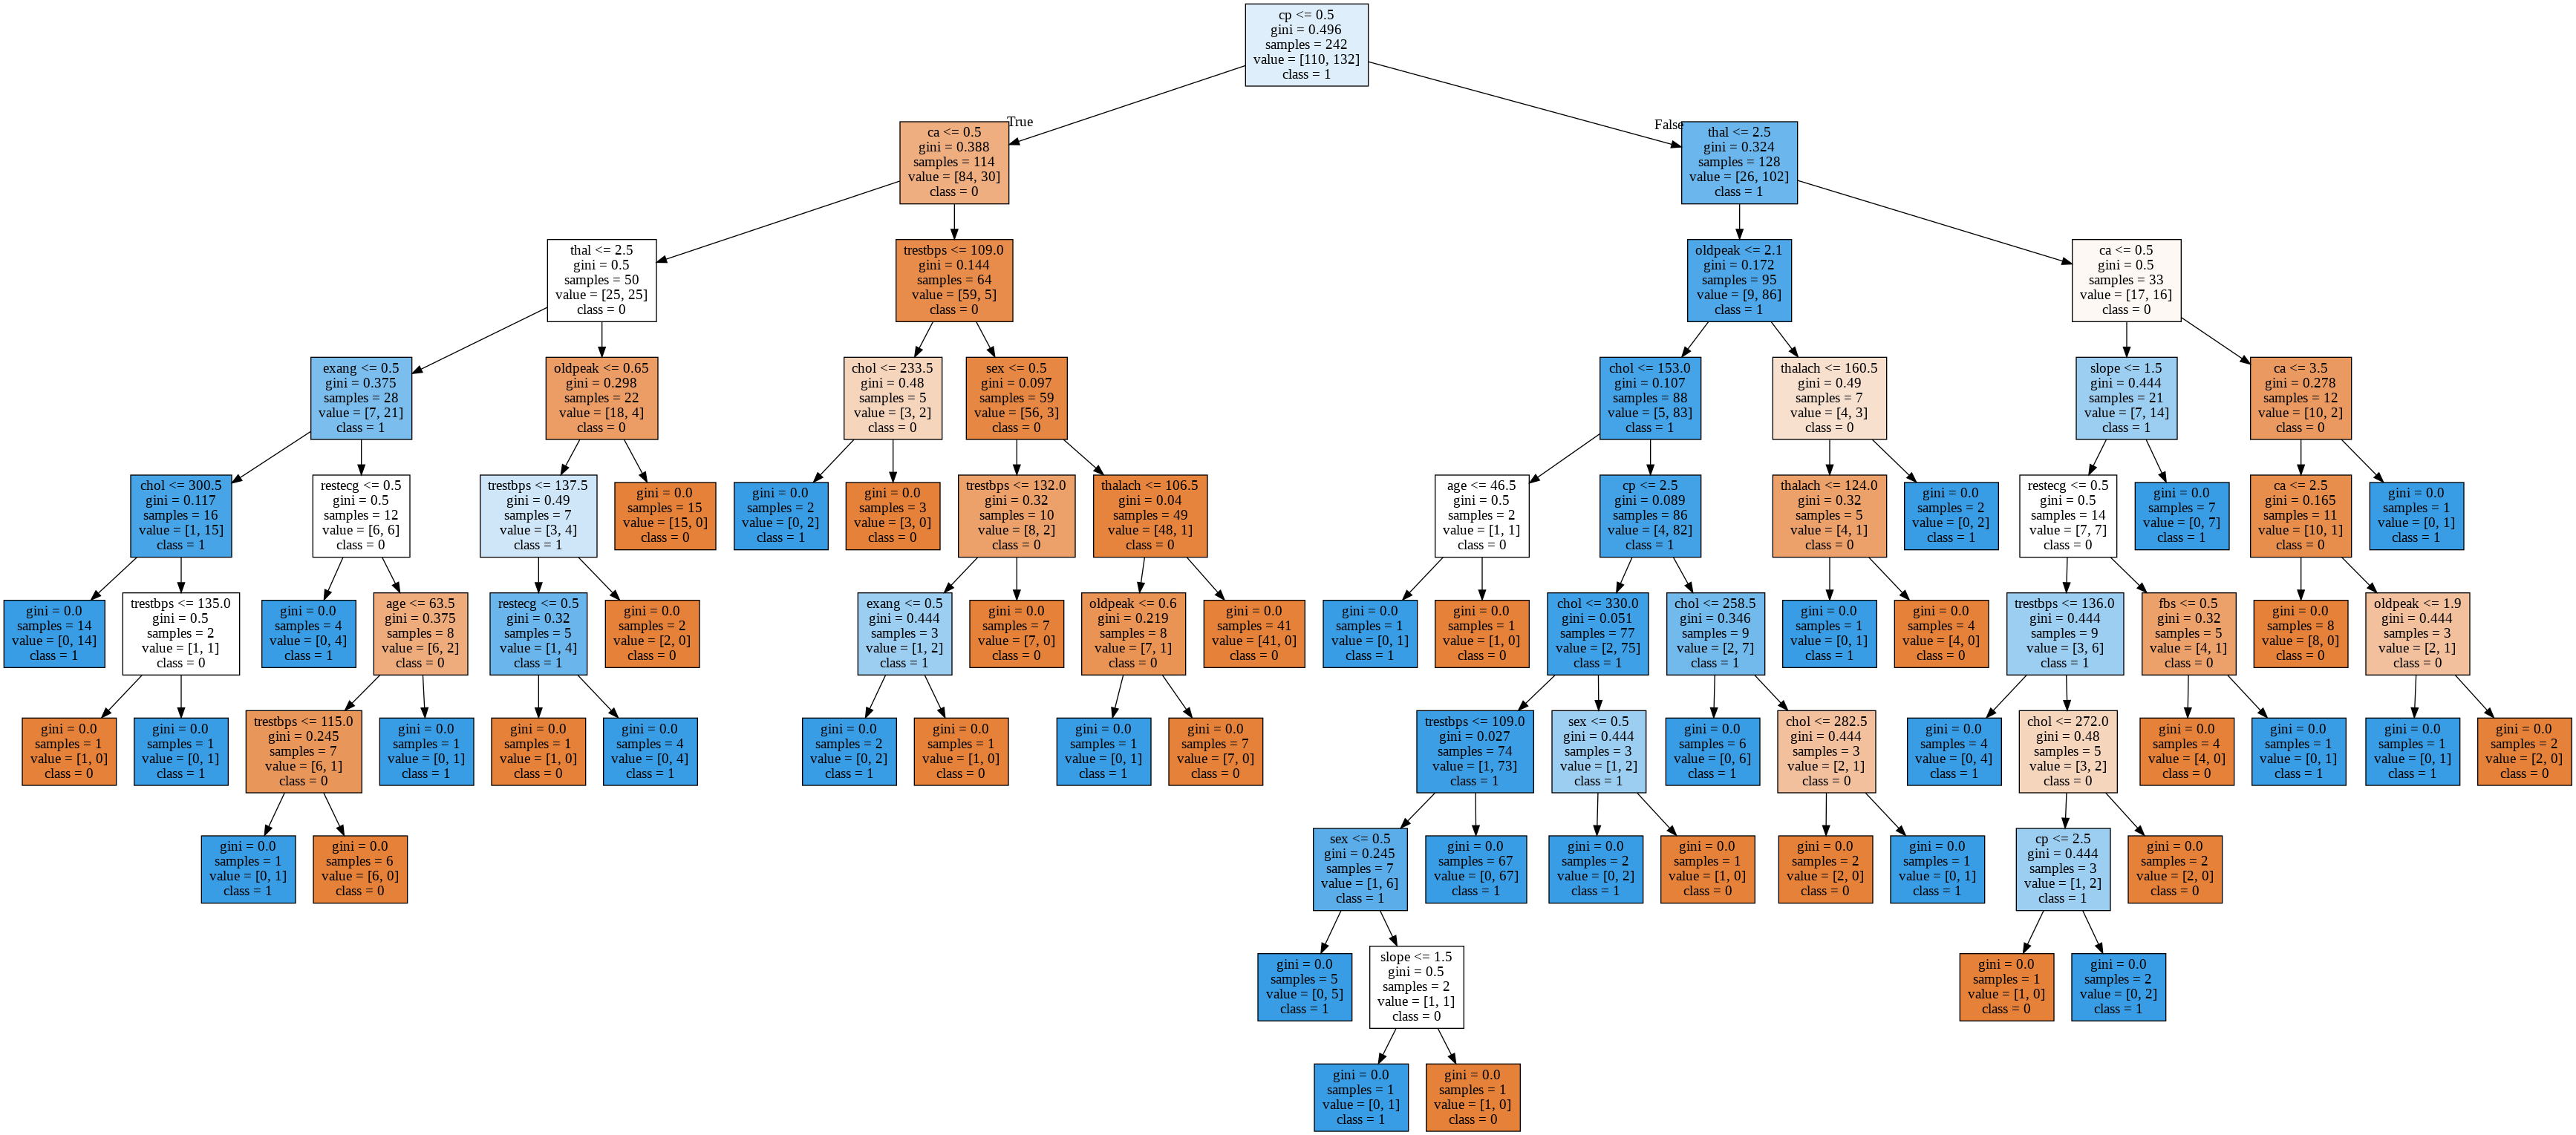

In [191]:
Image("heart.png", width=1200)

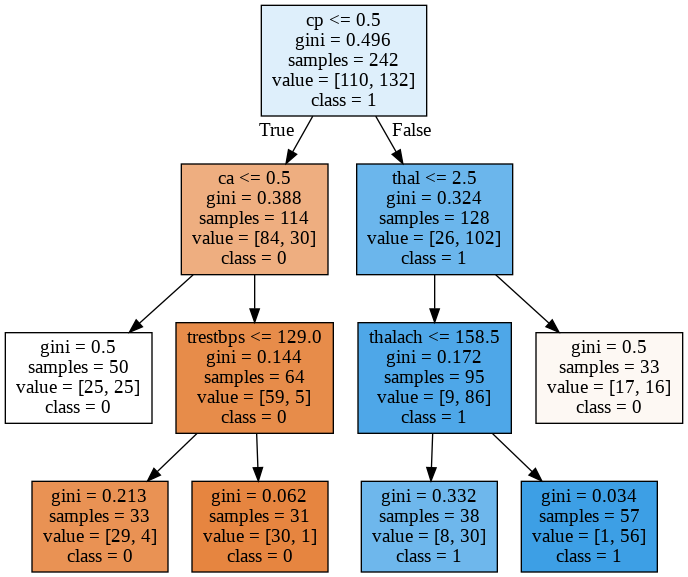

In [192]:
Image("heart1.png", width=1200)